# Display Visuals # Part1
- Create bar charts for qualitative variables, for example, the amount (number) of eggs consumed in a meal (categories: {breakfast, lunch, or dinner}). In general, bar chart maps categories to numbers.
- Create Pie charts. A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. A pie chart is preferably used when the number of categories is less, and you'd like to see the proportion of each category.
- Create histograms for quantitative variables. A histogram splits the (tabular) data into evenly sized intervals and displays the count of rows in each interval with bars. A histogram is similar to a bar chart, except that the "category" here is a range of values.
- Analyze the bar charts and histograms.

# Bar Chart
A bar chart depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


### Bar Chart using Seaborn

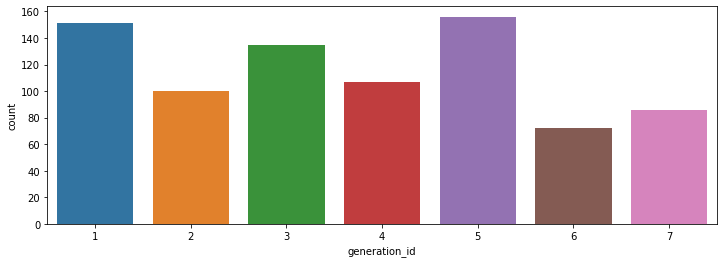

In [3]:
sb.countplot(data=pokemon, x='generation_id');

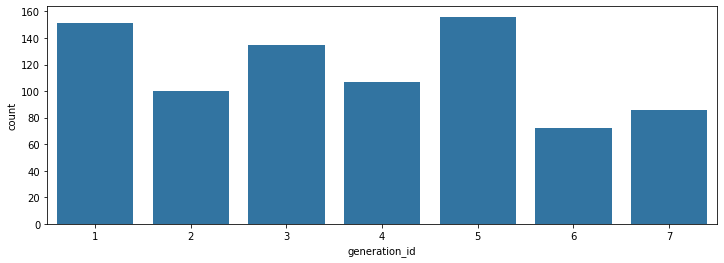

In [4]:
base_color = sb.color_palette()[0]
sb.countplot(data=pokemon, x='generation_id', color=base_color);

### Bar Chart using Matplotlib

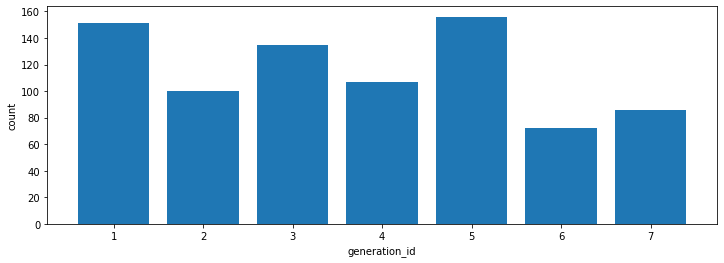

In [5]:
x = pokemon['generation_id'].unique()
y = pokemon['generation_id'].value_counts(sort=False)
plt.bar(x, y)
plt.xlabel('generation_id')
plt.ylabel('count')
plt.show()

### Static and dynamic ordering of the bars

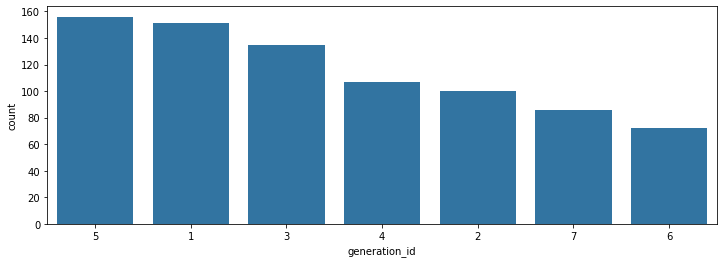

In [6]:
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

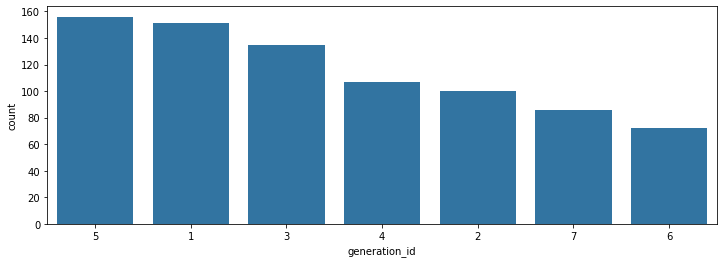

In [7]:
freq = pokemon['generation_id'].value_counts()
gen_order = freq.index
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

#### use categories

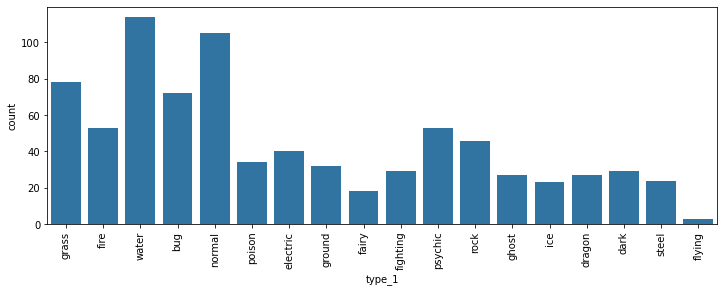

In [8]:
sb.countplot(data=pokemon, x='type_1', color=base_color);
plt.xticks(rotation=90);

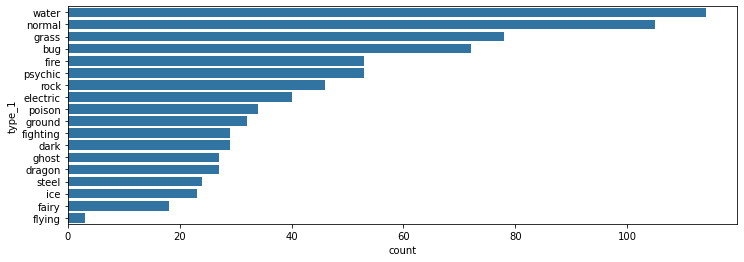

In [9]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

#### reshape the pokemon dataframe

In [10]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pkmn_types.head(10)
#pkmn_types.shape

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [11]:
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [12]:
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

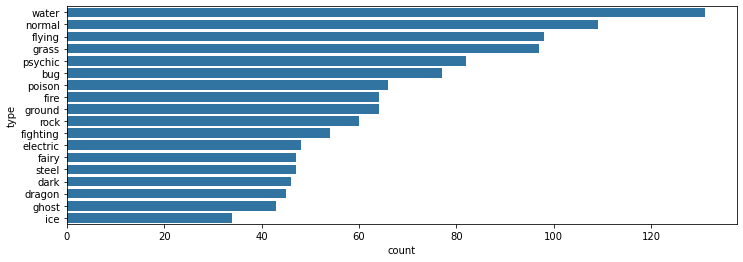

In [13]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

### Plot a bar chart having the proportions, instead of the actual count, on one of the axes

In [14]:
# Find the maximum proportion of bar
n_pokemon = pkmn_types['type'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

0.10808580858085809

### Create an array of evenly spaced proportioned values

In [15]:
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [16]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

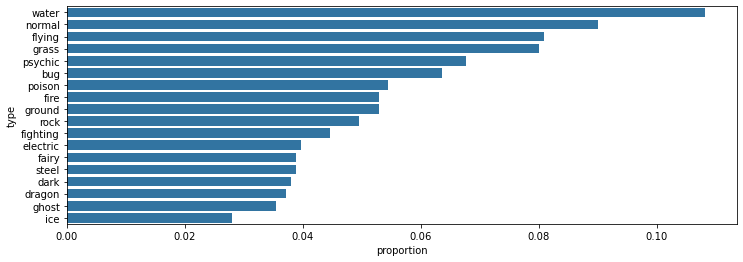

In [17]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

### Print the text (proportion) on the bars of a horizontal plot

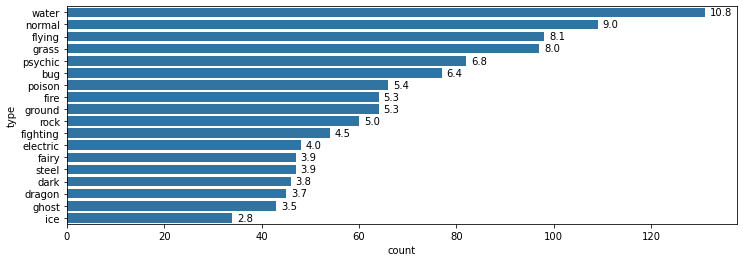

In [18]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

for i in range (type_counts.shape[0]):
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center')

#### Print the text (proportion) below the bars of a Vertical plot

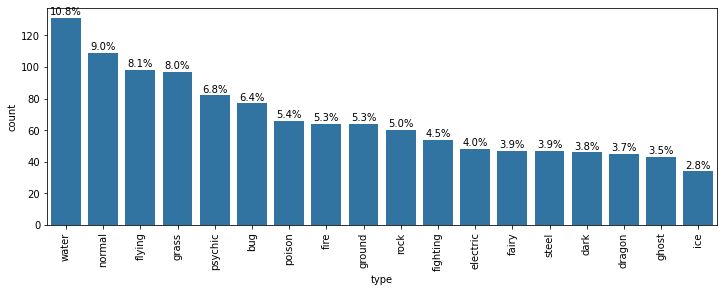

In [19]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);
type_counts = pkmn_types['type'].value_counts()

locs, labels = plt.xticks(rotation=90) 
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

### Counting missing values

In [20]:
pkmn_types.isna().sum()

id              0
species         0
type_level      0
type          402
dtype: int64

In [21]:
# drop  columns that do not have any NaN values
na_counts = pkmn_types.drop(['id', 'species', 'type_level'], axis=1).isna().sum()
na_counts

type    402
dtype: int64

### Plot the bar chart from the NaN  data, and  print values on each bar

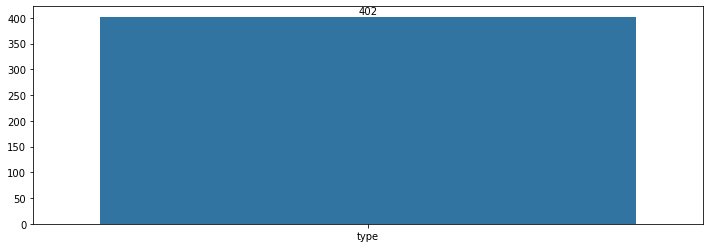

In [32]:
sb.barplot(na_counts.index.values, na_counts)
plt.xticks(rotation=90) 
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+20, count, ha = 'center', va='top')

# Pie chart
A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken. Use a Pie chart only when the number of categories is less, and you'd like to see the proportion of each category on a chart.

- show how teh data is broken down into parts
-  plot small number of slices (2 or 3)

## Guidelines to Use a Pie Chart
If you want to use a pie chart, try to follow certain guidelines:

Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.
If these guidelines cannot be met, then you should probably make use of a bar chart instead. A bar chart is a safer choice in general. The bar heights are more precisely interpreted than areas or angles, and a bar chart can be displayed more compactly than a pie chart. There's also more flexibility with a bar chart for plotting variables with a lot of levels, like plotting the bars horizontally.

I will use :
`matplotlib.pyplot.pie(x_data, labels, colors, startangle, counterclock, wedgeprops)`
`matplotlib.pyplot.axis(*args, emit=True, **kwargs)`


## Plot a simple Pie chart

We have the used option `Square`. 
The axis function call and 'square' argument makes it so that
the scaling of the plot is equal on both the x- and y-axes. 
Without this call, the pie could end up looking oval-shaped, rather than a circle.

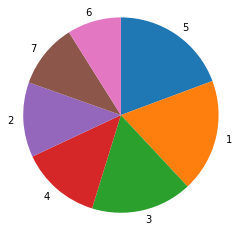

In [39]:
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

## Donut Plot
A sister plot to the pie chart is the donut plot. It's just like a pie chart, except that there's a hole in the center of the plot.
To create a donut plot, you can add a wedgeprops argument to the pie function call. By default, the radius of the pie (circle) is 1; setting the wedges' width property to less than 1 removes coloring from the center of the circle.

## Plot a simple Donut plot

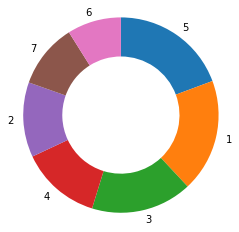

In [50]:
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

# Histograms
A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number. 

You can use either Matplotlib or Seaborn to plot the histograms. There is a mild variation in the specifics, such as plotting gaussian-estimation line along with bars in Seabron's distplot(), and the arguments that you can use in either case.

## Plot a default histogram

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

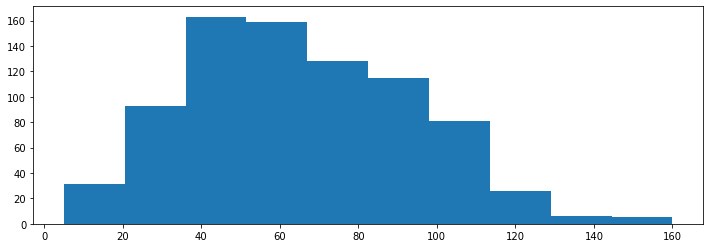

In [54]:
plt.hist(data = pokemon, x = 'speed') #note array info 

The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasizes the fact that the data takes on a continuous range of values.

By default, the hist function divides the data into 10 bins, based on the range of values taken. 

In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret.

Wouldn't it be better if I said "between 0 and 2.5" instead of "between about 0 and 2.5", and "from 2.5 to 5" instead of "from about 2.5 to 5" above?

You can use descriptive statistics (e.g. via dataframe['column'].describe()) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange function:

## Histogram with fixed number of bins

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

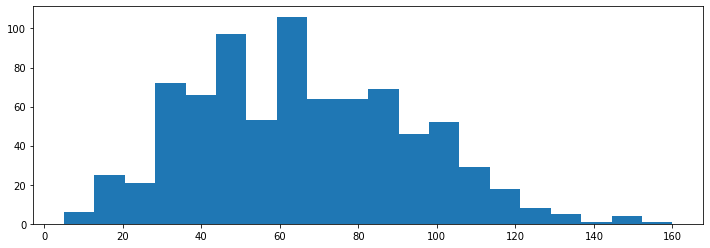

In [55]:
plt.hist(data = pokemon, x = 'speed', bins = 20)

## Histogram with dynamic number of bins
I've added a "+5" (the bin width). That is because arange will only return values that are strictly less than the upper limit. Adding in "+5" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around if you wanted to approach that end programmatically.

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

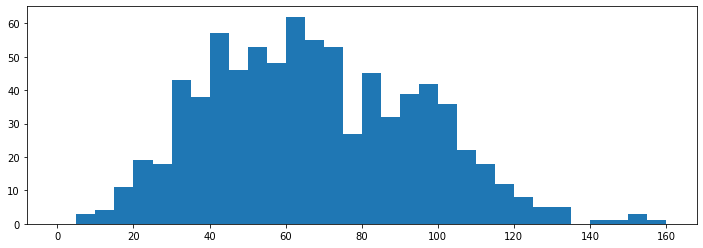

In [56]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins)

In [57]:
bins

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160])

In [58]:
pokemon['speed'].max()+5

165

## Alternative Approach - Seaborn's `distplot()`
This function can also plot histograms, as similar to the pyploy.hist() function, and is integrated with other univariate plotting functions.
This is in contrast to our ability to specify a data source and column as separate arguments, like we've seen with and countplot and hist.

`seaborn.distplot(Series, bins, kde, hist_kws)`

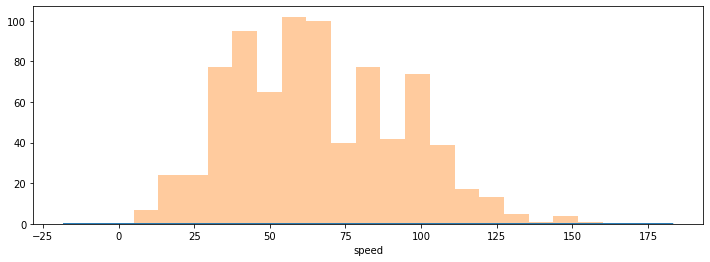

In [63]:
sb.distplot(pokemon['speed']);

# Set the argument `kde=False` to remove the estimate-line
#representing the Gaussian kernel density estimate.
sb.distplot(pokemon['speed'], kde=False);

Despite the fact that the default bin-selection formula used by distplot might be better than the choice of ten bins that .hist uses, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:

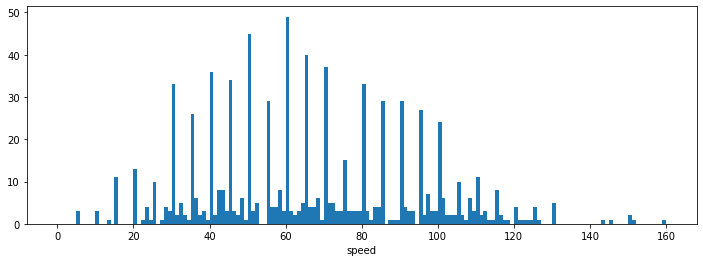

In [70]:
bin_edges = np.arange(0, pokemon['speed'].max()+1, 1)
sb.distplot(pokemon['speed'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

## Plot two histograms side-by-side
Will use  few new functions, `pyplot.subplot()` and `pyplot.figure()`

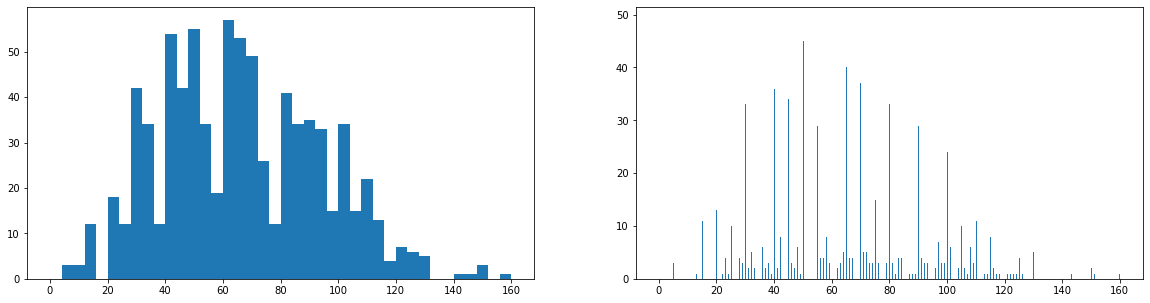

In [79]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

One alternative way we could have created the histogram is to explicitly set up the Figure and Axes like this:
## Demonstrate `figure.add_axes()` and `axes.hist()`
in `add_axes`, the first two elements of the list indicate the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure) 

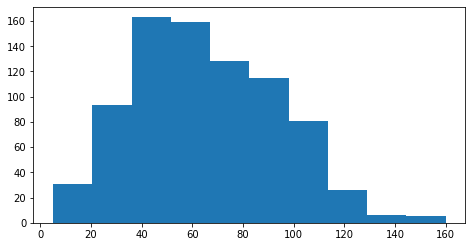

In [96]:
fig = plt.figure()
# [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .500, .750])
ax.hist(data=pokemon, x='speed');

## Use axes with `seaborn.countplot()`
To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn

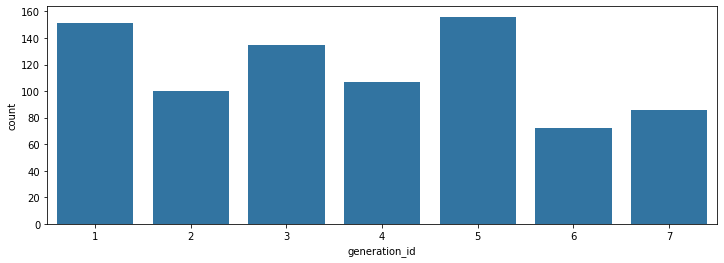

In [98]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax);

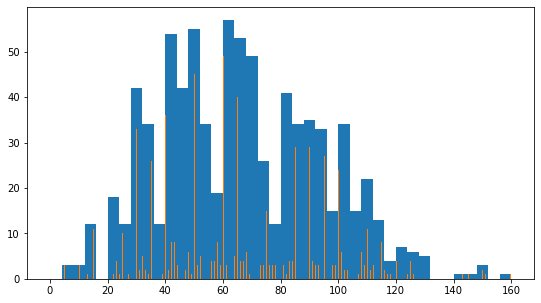

In [100]:
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size

bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);


## Additional Techniques
If you don't assign Axes objects as they're created, you can retrieve the current Axes using `ax = plt.gca()`, or you can get a list of all Axes in a Figure fig by using `axes = fig.get_axes()`. 

As for creating subplots, you can use `fig.add_subplot()` in the same way as `plt.subplot()` above. If you already know that you're going to be creating a bunch of subplots, you can use the `plt.subplots()` function:

## Demonstrate `pyplot.sca()` and `pyplot.text()` to generate a grid of subplots

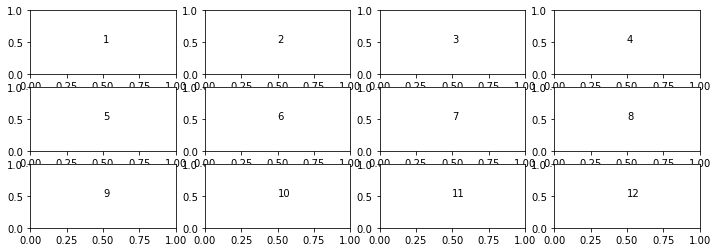

In [101]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes